# Exercise 01

1) Plot the binomial estimated by using frequency histograms.

First, we must store the frequencies given in the exercise in a data structure. We will make it a list of frequencies, which then we will transform into a list of occurrences.

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import math
from matplotlib import pyplot as plt
import random

In [2]:
freqs = [6, 10, 14, 13, 6, 1]

occurrences = []
for i, freq in enumerate(freqs):
    for occ in range(freq):
        occurrences.append(i)

random.shuffle(occurrences)
len(occurrences)

50

Now, we must plot these occurrences

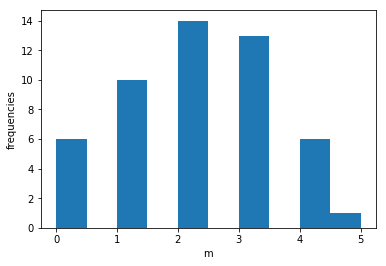

In [3]:
plt.hist(occurrences)
plt.xlabel("m")
plt.ylabel("frequencies")
plt.show()

2) Calculate the maximum likelihood estimate of $\mu$ and plot the resulting MLE Distribution.

Here, our random variable $m$ is the number of successes obtained from $N$ bernoulli trials. This number is obtained from a binomial distribution with $N = 5$ and success parameter $\mu$ which we want to estimate through MLE. We have a dataset $D$ of 50 observations $m_k$, each one giving us a value of m. Since each value of $m_k$ is actually composed by $5$ bernoulli trials, in the dataset $D$ we have $5*50 = 250$ independent bernoulli trials. Since $$\mu_{ML} = \frac{M}{T}$$ where $M$ is the total number of successes in the dataset and $T$ is the total number of independent bernoulli trials, we can write a function that computes the best value of $\mu$ as follows:

In [4]:
def mle(data, N, least=0):
    '''
    data: list, a list of values for the random variable m (that says how many successes were obtained in N bernoulli trials)
    N: int, number of trials per entry in the dataset.
    least: int, Takes into account only successes with m >= least
    '''
    total_bernoulli_trials = N*len(data)
    successes = sum([x for x in data if x>= least])
    return successes/total_bernoulli_trials

mle(occurrences, 5)

0.424

So the value of $\mu$ estimated from $D$ is $0.424$. The distribution is the following

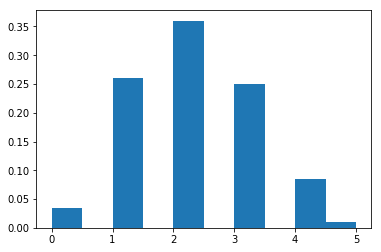

In [5]:
data = [np.random.binomial(5,0.424) for _ in range(200)]
weights = np.ones_like(data)/len(data)
plt.hist(data, weights=weights)
plt.show()

3) What is the maximum likelihood estimate of $P(m \geq 3)$?

In this case, we need to take into account only the successes that were obtained with $m \geq 3$, then:

In [6]:
mle(occurrences, 5, least=3)

0.272

4) Plot the prior distribution of $\mu$

The prior distribution of $mu$ is $$Pr(\mu \vert a=2, b=2) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$ which is a beta distribtion.

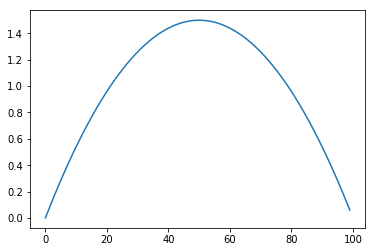

In [7]:
plt.plot([stats.beta.pdf(x/100,2,2) for x in range(100)])
plt.show()

5) Write and plot the posterior distribution of $\mu$

The posterior distribution of $\mu$, is a product of the Prior and the Likelihood functions, resulting in $$Pos(\mu \vert a=2, b=2) = \frac{\Gamma(a + m + b + l)}{\Gamma(a + m)\Gamma(b + l)}\mu^{m + a - 1}(1-\mu)^{l + b - 1}.$$ The distribution will be

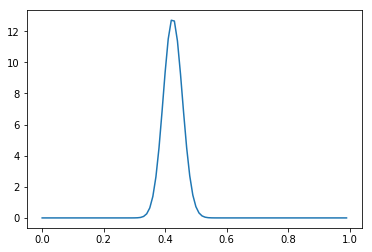

In [8]:
post_a = 2 + sum(occurrences)
post_b = 2 + (5*len(occurrences) - sum(occurrences))
plt.plot([0.01*x for x in range(100)],[stats.beta.pdf(x/100, post_a, post_b) for x in range(100)])
plt.show()

6) What is the expected posterior of $\mu$?

The expected posterior is given by $$P(\mu \vert D) = \frac{m + a}{m + a + l + b}$$

In [9]:
post_a/(post_a + post_b)

0.4251968503937008

Which is a really close value to what was predicted using MLE.